# Reading .ad2cp Data with Echopype

This notebook demonstrates the process of reading .ad2cp data using Echopype. It requires the test files 'ad2cp_01.ad2cp', which can be downloaded from the following [LINK](https://github.com/dankelley/oce/blob/develop/tests/testthat/local_data/ad2cp/ad2cp_01.ad2cp). Please make sure to place these files in an 'assets' folder, created in the directory where this notebook is running."

In [1]:
import echopype as ep
import os
import matplotlib.pyplot as plt

In [2]:
def check_file_existence(file_path):
    if not(os.path.exists(file_path)):
        print(f'{file_path} does not exist.') 

In [3]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'assets', 'ad2cp', 'oce', 'ad2cp_01.ad2cp')

In [4]:
ed = ep.open_raw(file_path, sonar_model='ad2cp') 

In [5]:
ed

<EchoData: standardized raw data from Internal Memory>
Top-level: contains metadata about the SONAR-netCDF4 file format.
├── Environment: contains information relevant to acoustic propagation through water.
├── Platform: contains information about the platform on which the sonar is installed.
├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
├── Sonar: contains sonar system metadata and sonar beam groups.
│   ├── Beam_group1: contains echo intensity, velocity and correlation data as well as other configuration parameters from the Average mode.
│   ├── Beam_group2: contains backscatter echo intensity and other configuration parameters from the Echosounder mode. Data can be pulse compressed or raw intensity.
│   └── Beam_group3: contains complex backscatter raw samples and other configuration parameters from the Echosounder mode, including complex data from the transmit pulse.
└── Vendor_specific: contains vendor-specific information about the sonar and the data.

In [6]:
ed.environment

<xarray.Dataset>
Dimensions:                 (time1: 9)
Coordinates:
  * time1                   (time1) datetime64[ns] 2019-06-04T16:01:05.000999...
Data variables:
    sound_speed_indicative  (time1) float64 1.455e+03 1.455e+03 ... 0.0
    temperature             (time1) float64 1.51 1.48 1.5 1.48 ... 1.49 1.49 0.0
    pressure                (time1) float64 269.1 269.1 269.2 ... 269.2 0.0

In [7]:
ed.to_netcdf(save_path=os.path.join(current_directory, 'assets', 'ad2cp', 'oce'))

In [8]:
def plot_temp_speed_pressure(ed):
    # Convert xarray Dataset to pandas DataFrame
    df = ed.environment.to_dataframe()

    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    # Plot sound_speed_indicative
    df['sound_speed_indicative'].plot(ax=axes[0])
    axes[0].set_title('Sound Speed Indicative')
    axes[0].set_ylabel('Speed [m/s]')

    # Plot temperature
    df['temperature'].plot(ax=axes[1])
    axes[1].set_title('Temperature')
    axes[1].set_ylabel('Temperature [°C]')

    # Plot pressure
    df['pressure'].plot(ax=axes[2])
    axes[2].set_title('Pressure')
    axes[2].set_ylabel('Pressure [dBar]')

    # Show the plot
    plt.tight_layout()
    plt.show()


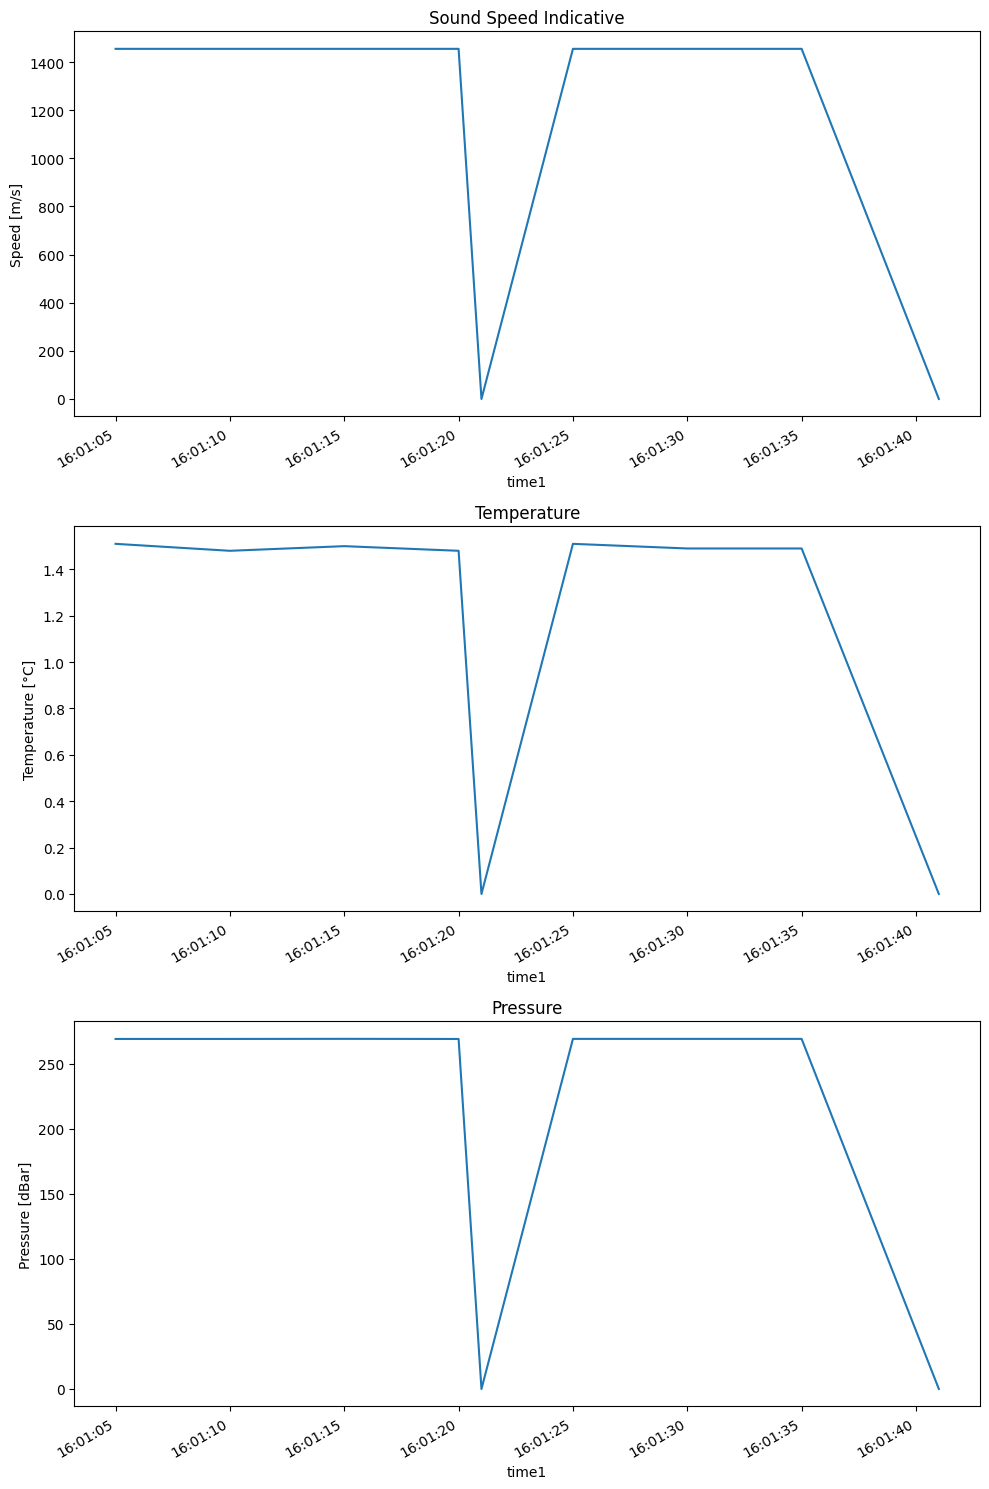

In [9]:
plot_temp_speed_pressure(ed)